In [ ]:
pip install category-encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import category_encoders as ce

In [ ]:
df = pd.read_excel("Sales Dataset.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2017-04-30 05:17:08.056834048,2015-01-03 00:00:00,2016-05-23 00:00:00,2017-06-26 00:00:00,2018-05-14 00:00:00,2018-12-30 00:00:00,NaN
Ship Date,9994,2017-05-04 04:17:20.304182528,2015-01-07 00:00:00,2016-05-27 00:00:00,2017-06-29 00:00:00,2018-05-18 00:00:00,2019-01-05 00:00:00,NaN
Postal Code,9983.0,55245.233297,1040.0,23223.0,57103.0,90008.0,99301.0,32038.715955
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


In [ ]:
df['Order ID'].value_counts()

,count
Order ID,
CA-2018-100111,14
CA-2018-157987,12
CA-2017-165330,11
US-2017-108504,11
US-2016-126977,10
...,...
CA-2015-110422,1
CA-2017-125794,1
CA-2018-163566,1


In [ ]:
df['Customer ID'].nunique()

793

In [ ]:
df['Customer ID'].value_counts()

,count
Customer ID,
WB-21850,37
MA-17560,34
JL-15835,34
PP-18955,34
CK-12205,32
...,...
AO-10810,1
LD-16855,1
JR-15700,1


In [ ]:
df['Product ID'].nunique()

1862

In [ ]:
df['Product ID'].value_counts()

,count
Product ID,
OFF-PA-10001970,19
TEC-AC-10003832,18
FUR-FU-10004270,16
FUR-CH-10002647,15
FUR-CH-10001146,15
...,...
TEC-MA-10004552,1
TEC-MA-10003589,1
OFF-AP-10003099,1


In [ ]:
df['Category'].nunique()

3

In [ ]:
df['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


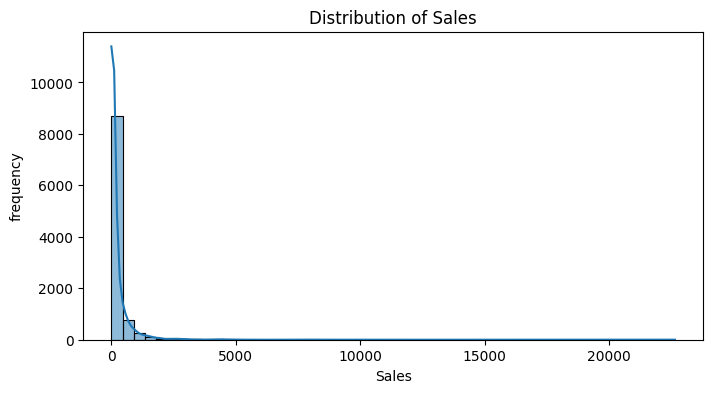

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.show()


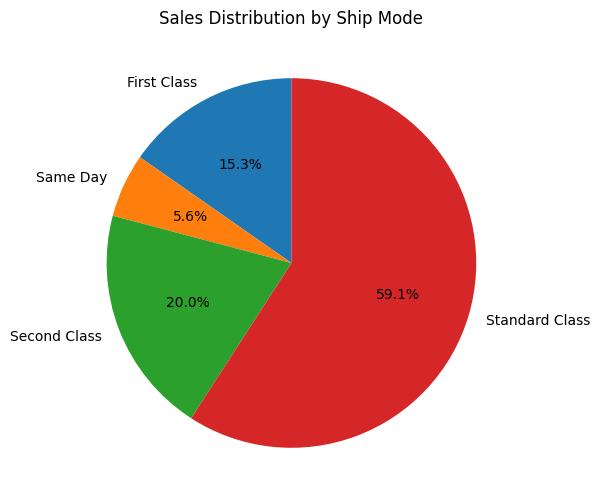

In [ ]:
sales_shipmode = df.groupby('Ship Mode')['Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(sales_shipmode, labels=sales_shipmode.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Ship Mode")
plt.show()

/tmp/ipython-input-3348488690.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None , palette="viridis")
/tmp/ipython-input-3348488690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None , palette="viridis")


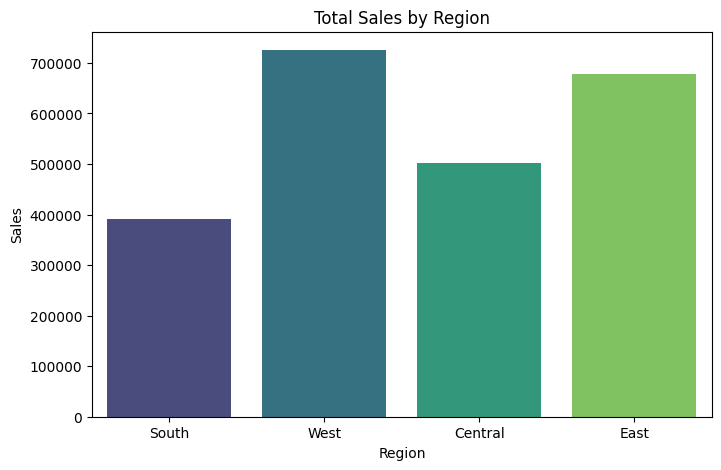

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None , palette="viridis")
plt.title("Total Sales by Region")
plt.show()

/tmp/ipython-input-3107436888.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', palette='Set2' )


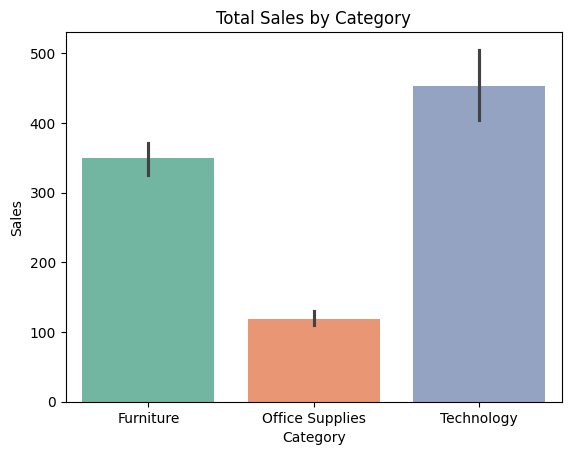

In [ ]:
sns.barplot(data=df, x='Category', y='Sales', palette='Set2' )
plt.title("Total Sales by Category")
plt.show()

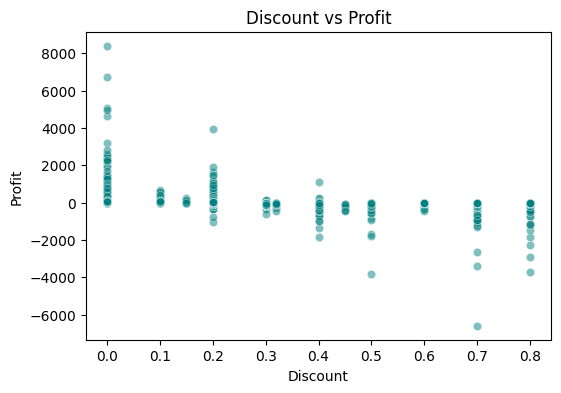

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5, color='teal')
plt.title('Discount vs Profit')
plt.show()

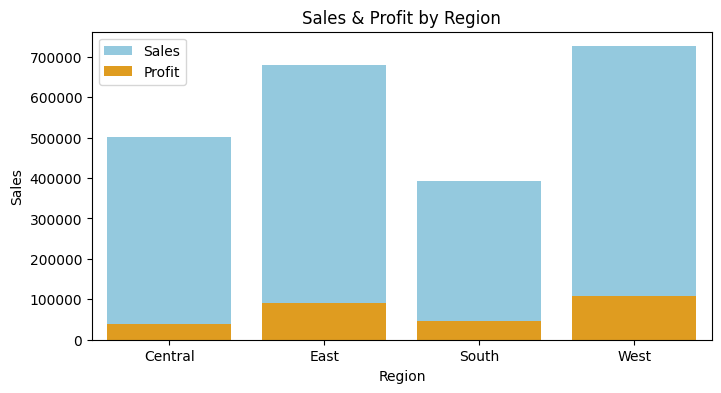

In [ ]:
region_stats = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=region_stats, x='Region', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=region_stats, x='Region', y='Profit', color='orange', label='Profit')
plt.title("Sales & Profit by Region")
plt.legend()
plt.show()

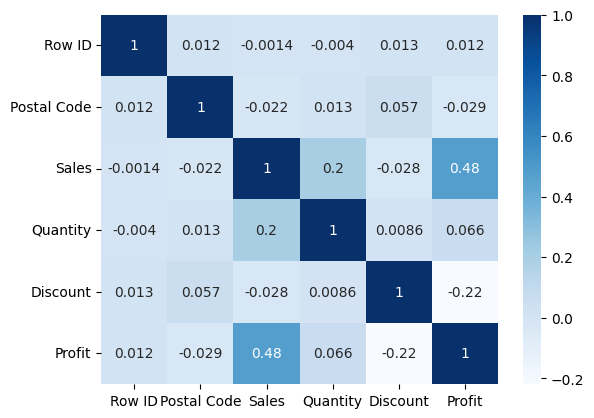

In [ ]:
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
df.drop(columns=['Row ID', 'Customer Name'], inplace=True)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9983 non-null   object        
 1   Order Date    9983 non-null   datetime64[ns]
 2   Ship Date     9983 non-null   datetime64[ns]
 3   Ship Mode     9983 non-null   object        
 4   Customer ID   9983 non-null   object        
 5   Segment       9983 non-null   object        
 6   Country       9983 non-null   object        
 7   City          9983 non-null   object        
 8   State         9983 non-null   object        
 9   Postal Code   9983 non-null   float64       
 10  Region        9983 non-null   object        
 11  Product ID    9983 non-null   object        
 12  Category      9983 non-null   object        
 13  Sub-Category  9983 non-null   object        
 14  Product Name  9983 non-null   object        
 15  Sales         9983 non-null   float64      

In [ ]:
df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [ ]:
df[df['Discount'] == 0.2]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092
11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,US-2017-103674,2017-12-06,2017-12-10,Standard Class,AP-10720,Home Office,United States,Los Angeles,California,90032.0,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816
9979,US-2017-103674,2017-12-06,2017-12-10,Standard Class,AP-10720,Home Office,United States,Los Angeles,California,90032.0,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152
9981,CA-2018-163566,2018-08-03,2018-08-06,First Class,TB-21055,Consumer,United States,Fairfield,Ohio,45014.0,East,OFF-LA-10004484,Office Supplies,Labels,Avery 476,16.520,5,0.2,5.3690
9989,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028


In [ ]:
df[(df['Quantity'] == 1) & (df['Discount'] == 0.2)]


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
70,CA-2017-106075,2017-09-18,2017-09-23,Standard Class,HM-14980,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10004654,Office Supplies,Binders,Avery Binding System Hidden Tab Executive Styl...,4.616,1,0.2,1.7310
74,US-2016-134026,2016-04-26,2016-05-02,Standard Class,JE-15745,Consumer,United States,Memphis,Tennessee,38109.0,South,OFF-ST-10004123,Office Supplies,Storage,Safco Industrial Wire Shelving System,72.784,1,0.2,-18.1960
107,CA-2018-119004,2018-11-23,2018-11-28,Standard Class,JM-15250,Consumer,United States,Charlotte,North Carolina,28205.0,South,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,27.992,1,0.2,2.0994
108,CA-2018-119004,2018-11-23,2018-11-28,Standard Class,JM-15250,Consumer,United States,Charlotte,North Carolina,28205.0,South,OFF-AR-10000390,Office Supplies,Art,Newell Chalk Holder,3.304,1,0.2,1.0738
202,CA-2015-133690,2015-08-03,2015-08-05,First Class,BS-11755,Consumer,United States,Denver,Colorado,80219.0,West,OFF-AP-10003622,Office Supplies,Appliances,"Bravo II Megaboss 12-Amp Hard Body Upright, Re...",2.600,1,0.2,0.2925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Consumer,United States,Houston,Texas,77070.0,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,39.992,1,0.2,6.9986
9793,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Consumer,United States,Houston,Texas,77070.0,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832,1,0.2,1.6308
9832,CA-2015-133963,2015-05-18,2015-05-22,Second Class,GA-14515,Consumer,United States,Dallas,Texas,75220.0,Central,OFF-PA-10001526,Office Supplies,Paper,Xerox 1949,3.984,1,0.2,1.4442
9902,CA-2018-117646,2018-08-21,2018-08-25,Standard Class,SC-20845,Consumer,United States,Louisville,Colorado,80027.0,West,OFF-PA-10001950,Office Supplies,Paper,Southworth 25% Cotton Antique Laid Paper & Env...,6.672,1,0.2,2.0850


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df["order_dayofweek"] = df["Order Date"].dt.dayofweek
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [ ]:
df.drop(columns=['Order ID', 'Customer ID', 'Order Date', 'Ship Date' ], inplace=True)

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,order_dayofweek,Shipping Days
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,11,2,3
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,11,2,3
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,6,0,4
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,10,1,7
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,10,1,7


In [ ]:
df['Shipping Days'].value_counts()

,count
Shipping Days,
4,2762
5,2172
2,1334
6,1204
3,1003
7,620
0,519
1,369


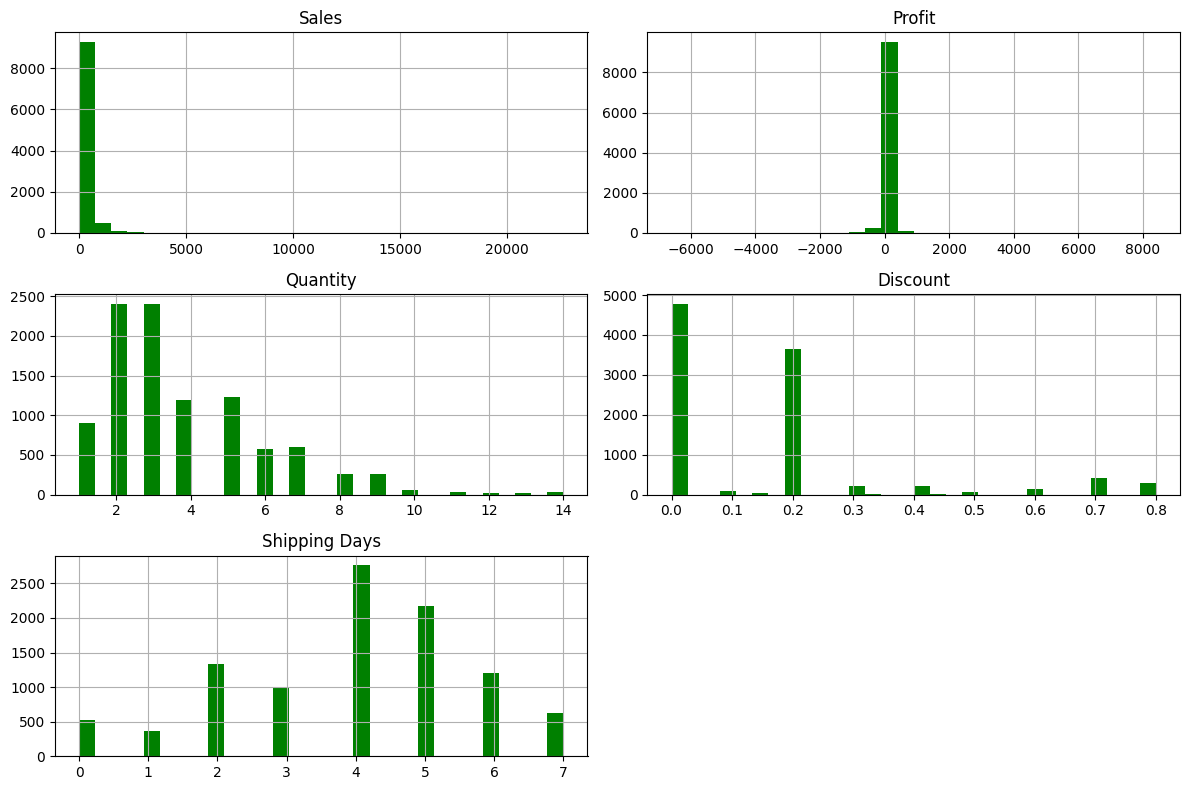

In [ ]:
numeric_cols = ['Sales','Profit','Quantity','Discount','Shipping Days']
df[numeric_cols].hist(bins=30, figsize=(12,8), color='Green')
plt.tight_layout()
plt.show()




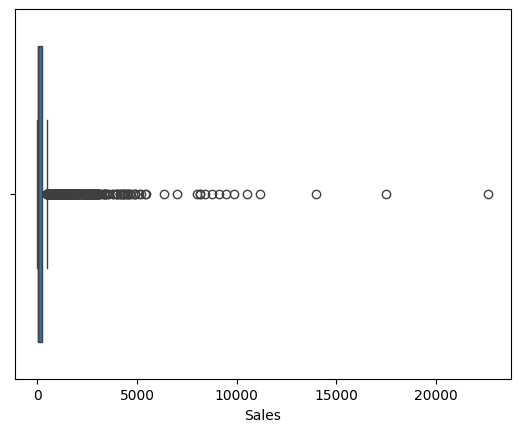

In [ ]:
sns.boxplot(x=df['Sales'])
plt.show()


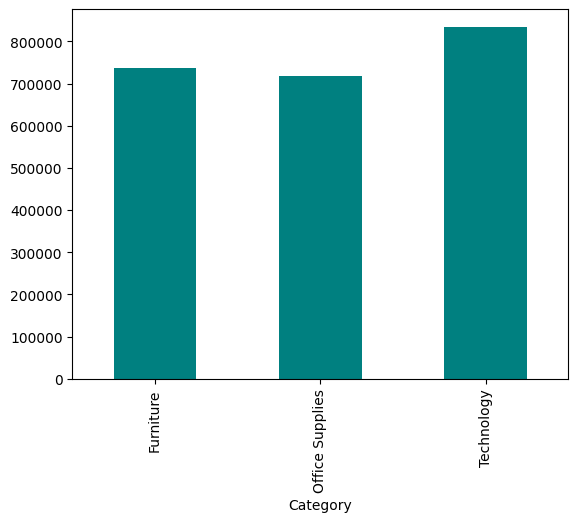

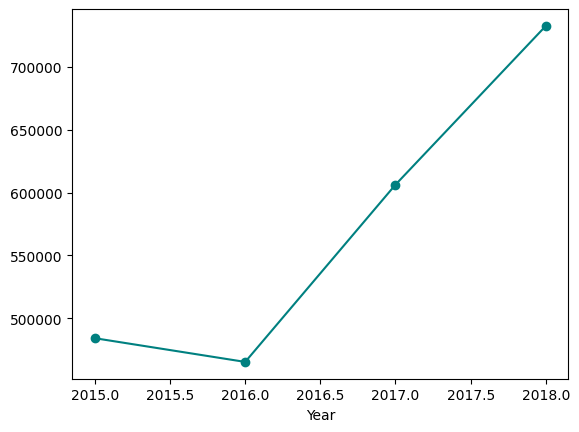

In [ ]:
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', color='teal')
plt.show()

df.groupby('Year')['Sales'].sum().plot(marker='o', color='teal')
plt.show()



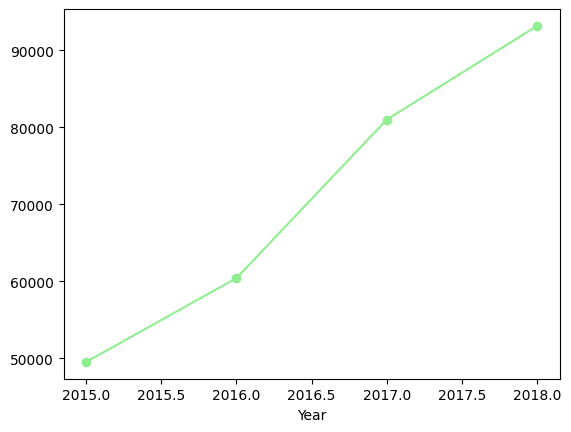

In [ ]:
df.groupby('Year')['Profit'].sum().plot(marker='o', color= 'lightgreen')
plt.show()


In [ ]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,order_dayofweek,Shipping Days
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,11,2,3
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,11,2,3
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,6,0,4
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,10,1,7
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,10,1,7
5,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2015,6,1,5
6,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,2015,6,1,5
7,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,2015,6,1,5
8,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2015,6,1,5
9,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,2015,6,1,5


In [ ]:
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5958
Second Class,1944
First Class,1538
Same Day,543


/tmp/ipython-input-2148983867.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segment', palette='Set1')


<Axes: xlabel='Segment', ylabel='count'>

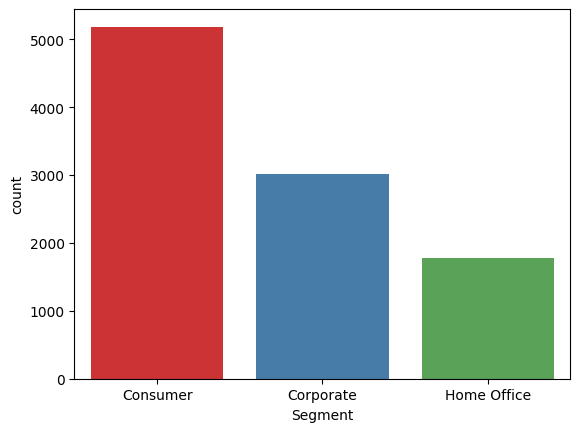

In [ ]:
sns.countplot(data=df, x='Segment', palette='Set1')

In [ ]:
'''df = pd.get_dummies(df, columns = ['Ship Mode'], drop_first=True)
df.head(10)'''

"df = pd.get_dummies(df, columns = ['Ship Mode'], drop_first=True)\ndf.head(10)"

In [ ]:
df['Segment'].value_counts()

,count
Segment,
Consumer,5186
Corporate,3015
Home Office,1782


In [ ]:
'''df = pd.get_dummies(df, columns = ['Segment'], drop_first=True)
df.head(10)'''

"df = pd.get_dummies(df, columns = ['Segment'], drop_first=True)\ndf.head(10)"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        9983 non-null   object 
 1   Segment          9983 non-null   object 
 2   Country          9983 non-null   object 
 3   City             9983 non-null   object 
 4   State            9983 non-null   object 
 5   Postal Code      9983 non-null   float64
 6   Region           9983 non-null   object 
 7   Product ID       9983 non-null   object 
 8   Category         9983 non-null   object 
 9   Sub-Category     9983 non-null   object 
 10  Product Name     9983 non-null   object 
 11  Sales            9983 non-null   float64
 12  Quantity         9983 non-null   int64  
 13  Discount         9983 non-null   float64
 14  Profit           9983 non-null   float64
 15  Year             9983 non-null   int32  
 16  Month            9983 non-null   int32  
 17  order_dayofweek  99

Binary encoding:Sub-Category,Year,Month,Shipping Days
One hot encoding: Region, Category

In [ ]:
'''encoder = ce.BinaryEncoder(cols=['Sub-Category', 'Year', 'Month', 'Shipping Days'])
df = encoder.fit_transform(df)

df.head()'''

"encoder = ce.BinaryEncoder(cols=['Sub-Category', 'Year', 'Month', 'Shipping Days'])\ndf = encoder.fit_transform(df)\n\ndf.head()"

In [ ]:
'''df = pd.get_dummies(df, columns = ['Region','Category'], drop_first=True)'''

"df = pd.get_dummies(df, columns = ['Region','Category'], drop_first=True)"

In [ ]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,order_dayofweek,Shipping Days
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,11,2,3
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,11,2,3
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,6,0,4
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,10,1,7
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,10,1,7
5,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2015,6,1,5
6,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,2015,6,1,5
7,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,2015,6,1,5
8,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2015,6,1,5
9,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,2015,6,1,5


In [ ]:
print(df['City'].nunique())
print(df['State'].nunique())
print(df['Product ID'].nunique())

531
48
1861


In [ ]:
'''encoder = ce.BinaryEncoder(cols=['City', 'State', 'Product ID'])
df = encoder.fit_transform(df)'''
y = df['Sales']
cat_cols = df.select_dtypes(include=["object"]).columns
#cat_cols= ['City', 'State', 'Product ID', 'Sub-Category', 'Year', 'Month', 'Shipping Days', 'Segment', 'Ship Mode', 'Region','Category']
encoder = ce.TargetEncoder(cols=cat_cols)
df = encoder.fit_transform(df,y)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        9983 non-null   float64
 1   Segment          9983 non-null   float64
 2   Country          9983 non-null   float64
 3   City             9983 non-null   float64
 4   State            9983 non-null   float64
 5   Postal Code      9983 non-null   float64
 6   Region           9983 non-null   float64
 7   Product ID       9983 non-null   float64
 8   Category         9983 non-null   float64
 9   Sub-Category     9983 non-null   float64
 10  Product Name     9983 non-null   float64
 11  Sales            9983 non-null   float64
 12  Quantity         9983 non-null   int64  
 13  Discount         9983 non-null   float64
 14  Profit           9983 non-null   float64
 15  Year             9983 non-null   int32  
 16  Month            9983 non-null   int32  
 17  order_dayofweek  99

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,order_dayofweek,Shipping Days
0,235.842783,223.688578,229.216818,339.147101,263.249769,42420.0,241.803645,243.792991,347.748794,486.674433,243.792991,261.9600,2,0.00,41.9136,2017,11,2,3
1,235.842783,223.688578,229.216818,339.147101,263.249769,42420.0,241.803645,432.979183,347.748794,532.035557,432.979183,731.9400,3,0.00,219.5820,2017,11,2,3
2,235.842783,232.127405,229.216818,235.410095,228.729451,90036.0,226.493233,184.823233,119.076000,34.303055,184.823233,14.6200,2,0.00,6.8714,2017,6,0,4
3,226.586367,223.688578,229.216818,266.751413,233.612815,33311.0,241.803645,385.723966,347.748794,648.794771,385.723966,957.5775,5,0.45,-383.0310,2016,10,1,7
4,226.586367,223.688578,229.216818,266.751413,233.612815,33311.0,241.803645,198.419154,119.076000,263.052447,198.419154,22.3680,2,0.20,2.5164,2016,10,1,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        9983 non-null   float64
 1   Segment          9983 non-null   float64
 2   Country          9983 non-null   float64
 3   City             9983 non-null   float64
 4   State            9983 non-null   float64
 5   Postal Code      9983 non-null   float64
 6   Region           9983 non-null   float64
 7   Product ID       9983 non-null   float64
 8   Category         9983 non-null   float64
 9   Sub-Category     9983 non-null   float64
 10  Product Name     9983 non-null   float64
 11  Sales            9983 non-null   float64
 12  Quantity         9983 non-null   int64  
 13  Discount         9983 non-null   float64
 14  Profit           9983 non-null   float64
 15  Year             9983 non-null   int32  
 16  Month            9983 non-null   int32  
 17  order_dayofweek  99

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9982 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        9982 non-null   float64
 1   Segment          9982 non-null   float64
 2   Country          9982 non-null   float64
 3   City             9982 non-null   float64
 4   State            9982 non-null   float64
 5   Postal Code      9982 non-null   float64
 6   Region           9982 non-null   float64
 7   Product ID       9982 non-null   float64
 8   Category         9982 non-null   float64
 9   Sub-Category     9982 non-null   float64
 10  Product Name     9982 non-null   float64
 11  Sales            9982 non-null   float64
 12  Quantity         9982 non-null   int64  
 13  Discount         9982 non-null   float64
 14  Profit           9982 non-null   float64
 15  Year             9982 non-null   int32  
 16  Month            9982 non-null   int32  
 17  order_dayofweek  99

In [ ]:
#scaler = StandardScaler()
#df['Profit'] = scaler.fit_transform(df[['Profit']])
from sklearn.preprocessing import RobustScaler
y = np.log1p(df["Sales"])
X = df.drop(columns=["Sales"])
scaler = RobustScaler()
df['Profit'] = scaler.fit_transform(df[['Profit']])

In [ ]:
lr_model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


 Mean Squared Error: 0.8761687918114378
R^2 Score: 0.6508077108771964


In [ ]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_svm_pred)
r2_svm = r2_score(y_test, y_svm_pred)
print(f"SVM Root Mean Squared Error: {mse_svm}")
print(f"SVM R^2 Score: {r2_svm}")

SVM Root Mean Squared Error: 2.3001546404436795
SVM R^2 Score: 0.08328592419686931


In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
random_forest_model.fit(X_train, y_train)
y_rf_pred = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_rf_pred)
print(f"Random Forest Root Mean Squared Error: {rmse}")
print(f"Random Forest R^2 Score: {r2_rf}")


Random Forest Root Mean Squared Error: 0.26549376931886803
Random Forest R^2 Score: 0.9719078142223898


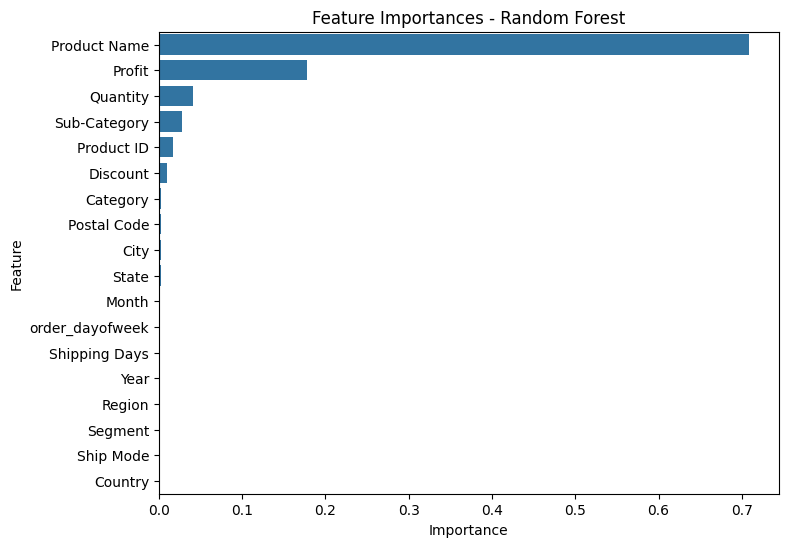

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = random_forest_model.feature_importances_
features = df.drop(columns=['Sales']).columns  # replace with your target
imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
imp_df = imp_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title("Feature Importances - Random Forest")
plt.show()


In [ ]:
xgb_model = XGBRegressor(n_estimators=2000, learning_rate=0.05,max_depth=5,
    subsample=0.9,
    min_child_weight=3,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",
    eval_metric="rmse"
)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=50
)


[0]	validation_0-rmse:1.51387
[50]	validation_0-rmse:0.35032
[100]	validation_0-rmse:0.28212
[150]	validation_0-rmse:0.26433
[200]	validation_0-rmse:0.25600
[250]	validation_0-rmse:0.24862
[300]	validation_0-rmse:0.24446
[350]	validation_0-rmse:0.24116
[400]	validation_0-rmse:0.23788
[450]	validation_0-rmse:0.23485
[500]	validation_0-rmse:0.23215
[550]	validation_0-rmse:0.22963
[600]	validation_0-rmse:0.22793
[650]	validation_0-rmse:0.22655
[700]	validation_0-rmse:0.22547
[750]	validation_0-rmse:0.22384
[800]	validation_0-rmse:0.22280
[850]	validation_0-rmse:0.22202
[900]	validation_0-rmse:0.22087
[950]	validation_0-rmse:0.22066
[1000]	validation_0-rmse:0.21997
[1050]	validation_0-rmse:0.21916
[1100]	validation_0-rmse:0.21835
[1150]	validation_0-rmse:0.21724
[1200]	validation_0-rmse:0.21697
[1250]	validation_0-rmse:0.21672
[1300]	validation_0-rmse:0.21608
[1350]	validation_0-rmse:0.21586
[1400]	validation_0-rmse:0.21554
[1450]	validation_0-rmse:0.21533
[1500]	validation_0-rmse:0.21505


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_xgb_pred = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_xgb_pred)
print(f"XGBoost Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")

XGBoost Root Mean Squared Error: 0.2127588028942212
XGBoost R^2 Score: 0.9819593599642447


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_knn_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_knn_pred)
print(f"KNN Root Mean Squared Error: {rmse_knn}")
print(f"KNN R^2 Score: {r2_knn}")

KNN Root Mean Squared Error: 0.9035462621627408
KNN R^2 Score: 0.6746298913956039
